In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [279]:
df_og = pd.read_csv('spotify_dataset_mod.csv')
df_og.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,release_year
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2022.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2021.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2021.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2018.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,2017.0


In [280]:
# para volver
df = df_og.copy()

In [281]:
df = df.drop_duplicates()
df.shape

(113550, 21)

# Tratamiento de valores faltantes


Se eliminaron las columnas donde se encontraron nulos de texto como del nombre de artista, canción y album, son irrelevantes para un modelo. Igualmente, se eliminaron los registros que tuvieran valor faltante en el release_year. En general, no impactan demasiado porque representan una minúscula parte del dataset.

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           113550 

In [283]:
df.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [284]:
# se borran las columnas identificadoras, no serán utilizadas en un modelo
df_nocols = df.drop(columns = ['track_id','artists','album_name','track_name'])
# se borran los registros que tengan nulo el release_year
df_nocols = df_nocols.dropna().reset_index(drop=True)
df_nocols.isnull().sum().sum()

np.int64(0)

In [285]:
df_nocols.shape

(113298, 17)

In [286]:
df_nocols.describe().round(3)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,113298.000,113298.000,113298.000,113298.000,113298.00,113298.000,113298.000,113298.000,113298.000,113298.000,113298.000,113298.000,113298.000,113298.000,113298.000
mean,33.274,228045.412,0.567,0.642,5.31,-8.245,0.638,0.085,0.314,0.156,0.214,0.474,122.186,3.904,2013.403
std,22.276,106498.546,0.173,0.251,3.56,5.015,0.481,0.106,0.332,0.309,0.191,0.259,29.976,0.432,11.732
min,0.000,8586.000,0.000,0.000,0.00,-49.531,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1900.000
25%,17.000,174106.000,0.456,0.473,2.00,-10.002,0.000,0.036,0.017,0.000,0.098,0.260,99.306,4.000,2010.000
50%,35.000,212948.000,0.580,0.685,5.00,-6.995,1.000,0.049,0.168,0.000,0.132,0.464,122.022,4.000,2018.000
75%,50.000,261519.000,0.695,0.854,8.00,-5.000,1.000,0.085,0.595,0.049,0.274,0.683,140.077,4.000,2022.000
max,100.000,5237295.000,0.985,1.000,11.00,4.532,1.000,0.965,0.996,1.000,1.000,0.995,243.372,5.000,2025.000


# Tratamiento de Outliers

Se optó por eliminar outliers de duration_ms solamente para cubrir solo las canciones que representen el consumo general, dejando de lado interludios o intros de álbumes (en el lado corto) y compilaciones y conciertos grabados (en el lado largo). El resto de variables es información valiosa que representa la riqueza y diversidad de la música respecto a sus géneros, por lo que optamos por mantenerlo. Así cubrimos la información que tenga razón de ser y que no son errores de captura o casos atípicos.

In [287]:
df_out = df_nocols.copy()

In [288]:
# columnas diferentes
zero_one = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
categoric_cols = ['key','mode','time_signature','explicit']
other_numeric = ['popularity','duration_ms','loudness','tempo']

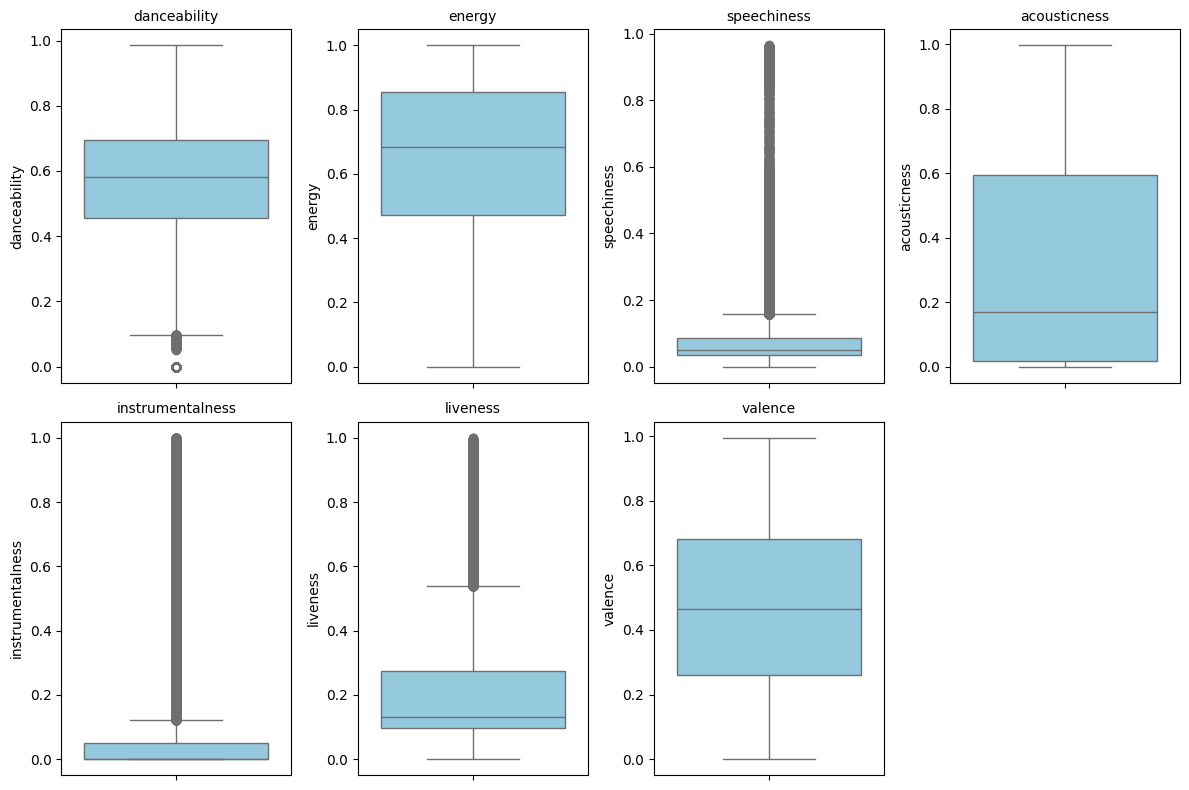

In [289]:
# Set up the grid
def set_up_grid(df,number_cols = 4,list_vars = zero_one,figure_size = (12, 8)):
  ncols = number_cols
  nrows = (len(list_vars) + ncols - 1) // ncols  # enough rows to fit all
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figure_size)

  # Flatten axes for easy iteration
  axes = axes.flatten()

  # Loop through features
  for i, col in enumerate(list_vars):
      sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
      axes[i].set_title(col, fontsize=10)

  # Remove unused subplots if any
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

set_up_grid(df_out)

In [290]:
df_out.loc[(df_out['duration_ms'] > 15 * 60 * 1000) | (df_out['duration_ms'] < 30 * 1000),'track_genre'].value_counts()

,count
track_genre,
iranian,24
classical,19
folk,15
new-age,9
breakbeat,8
sleep,7
british,6
black-metal,6
detroit-techno,6


In [291]:
df_out[['duration_ms','track_genre']].loc[df_out['track_genre'] == 'comedy'].sort_values(by='duration_ms',ascending=False)

,duration_ms,track_genre
18784,1101318,comedy
18258,1081982,comedy
18034,964097,comedy
18699,900066,comedy
18395,871093,comedy
...,...,...
18540,40125,comedy
18057,39426,comedy
18750,35293,comedy
18429,33000,comedy


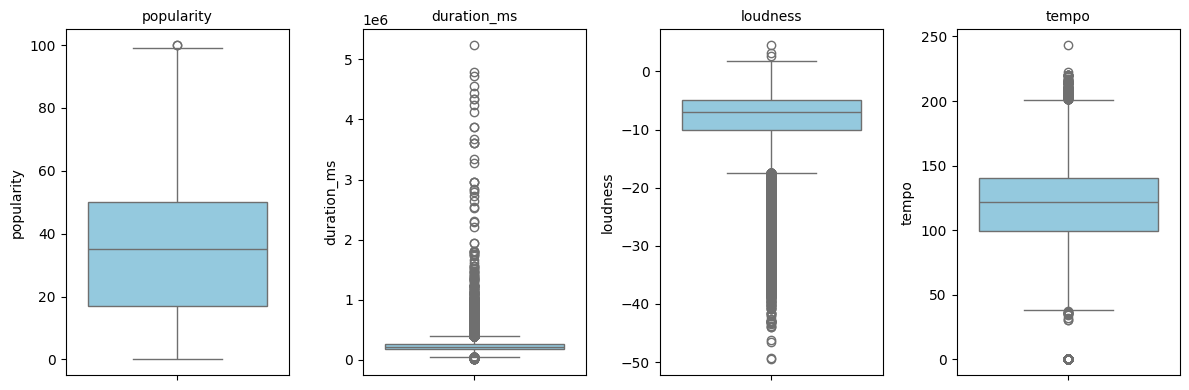

In [292]:
set_up_grid(df_out,list_vars=other_numeric,number_cols=4,figure_size=(12,4))

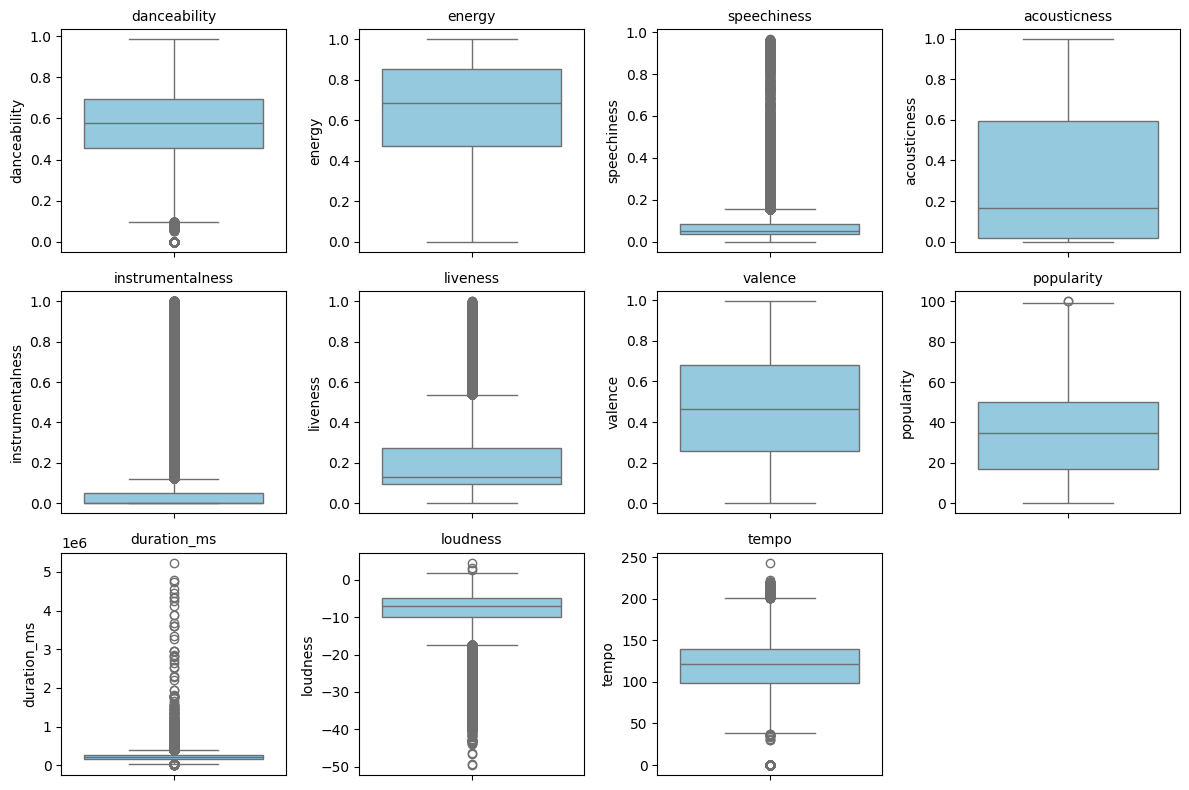

In [293]:
set_up_grid(df_out,list_vars=zero_one + other_numeric,number_cols=4,figure_size=(12,8))

In [294]:
df_out_edit = df_out.loc[
    (df_out['duration_ms'] >= 30 * 1000) &
    (df_out['duration_ms'] <= 15 * 60 * 1000)]

In [295]:
df_out_edit['duration_ms'].describe() / (60*1000)

,duration_ms
count,1.885517
mean,3.769566
std,1.421788
min,0.501333
25%,2.901100
50%,3.547550
75%,4.354142
max,14.940750


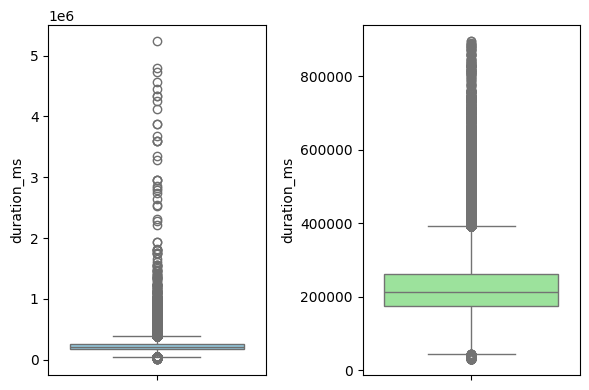

In [296]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

sns.boxplot(y=df_out['duration_ms'], ax=axes[0], color="skyblue")
sns.boxplot(y=df_out_edit['duration_ms'], ax=axes[1], color="lightgreen")

plt.tight_layout()
plt.show()

In [297]:
df_out_edit.shape

(113131, 17)

# Codificación de variables

Para la variable key se utilizó One Hot Encoding por su distribución más o menos uniforme y no son tantas categorías, por lo que no afecta mucho en la dimensionalidad. Por otro lado, se mantuvo binario el mode y la variable explícita se pasó a binario. El time signature se modificó para balancear su distribución, creando time_signature_4. De igual manera, release_year por su gran desbalanceo también se generó una variable nueva '10yo_release' el cual indica con 1 si una canción tiene 10 años de antigüedad o más, y lo contrario con 0. Esto genera columnas con información relevante cuya cardinalidad original no es de gran importancia o valor para el análisis a cubrir.

In [298]:
df_var_code = df_out_edit.copy()

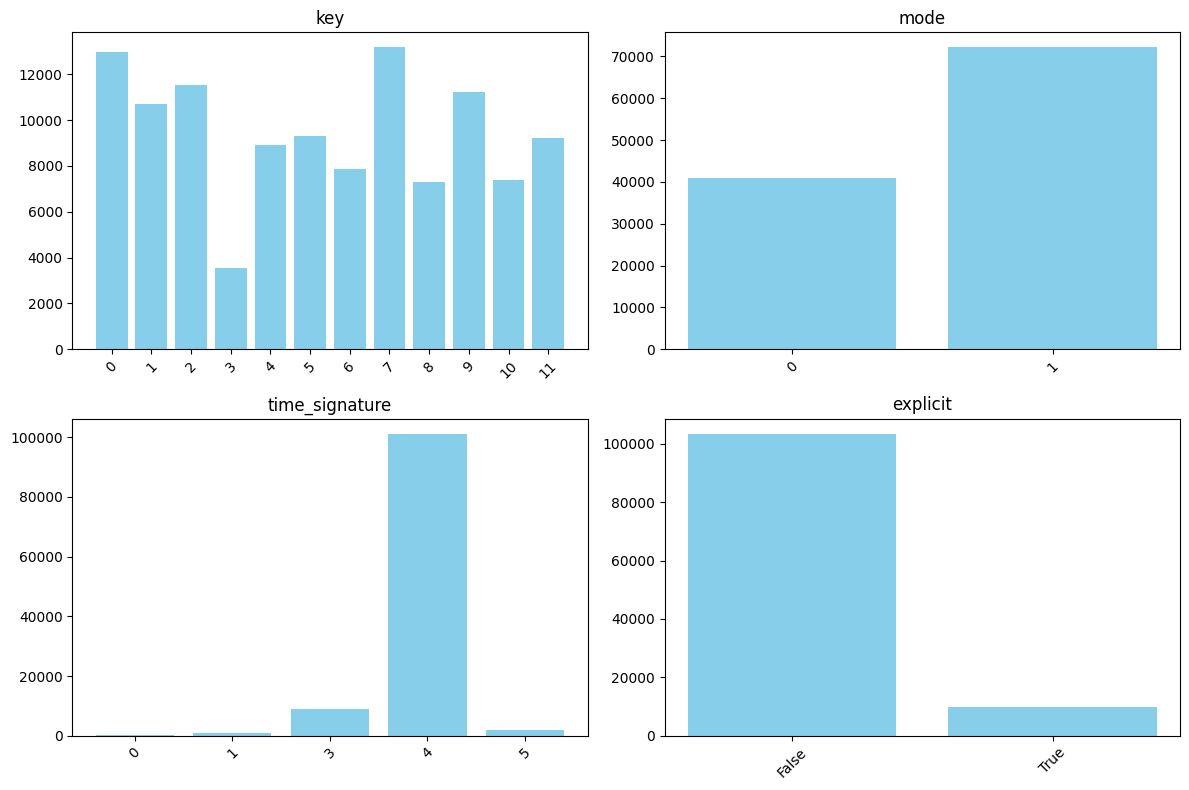

In [299]:
# Grid layout
ncols = 2
nrows = (len(categoric_cols) + ncols - 1) // ncols  # enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*4))
axes = axes.flatten()

for i, col in enumerate(categoric_cols):
    counts = df_var_code[col].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values, color='skyblue')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)  # rotate labels if needed

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [300]:
df_var_code.loc[df_var_code['time_signature'] != 4].shape

(11999, 17)

In [301]:
df_var_code['time_signature_4'] = df_var_code['time_signature'].apply(lambda x: 1 if x == 4 else 0)
df_var_code.drop(columns='time_signature',inplace=True)

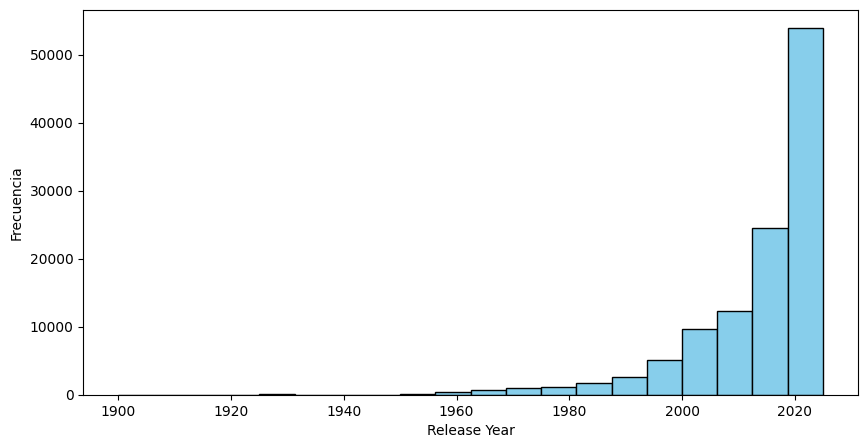

In [302]:
# histogram of release_year
plt.figure(figsize=(10, 5))
plt.hist(df_var_code['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frecuencia')
plt.show()

In [303]:
df_var_code.loc[df_var_code['release_year'] <= 2015].shape

(44322, 17)

In [304]:
df_var_code['10yo_release'] = df_var_code['release_year'].apply(lambda x: 1 if x <= 2015 else 0)
df_var_code.drop(columns='release_year',inplace=True)

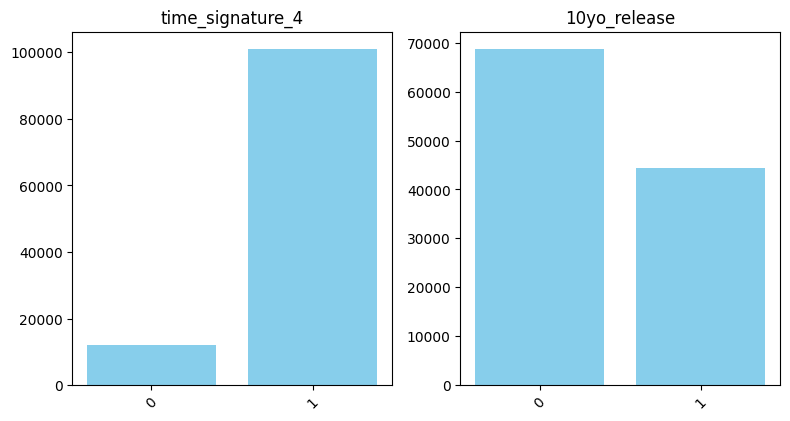

In [305]:
# Grid layout
ncols = 2
nrows = (len(categoric_cols) + ncols - 1) // ncols  # enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, nrows*4))
axes = axes.flatten()

for i, col in enumerate(['time_signature_4','10yo_release']):
    counts = df_var_code[col].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values, color='skyblue')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)  # rotate labels if needed

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [306]:
# label encode explicit
le = LabelEncoder()
df_var_code['explicit'] = le.fit_transform(df_var_code['explicit'])
df_var_code['track_genre'] = le.fit_transform(df_var_code['track_genre'])

In [307]:
df_var_code = pd.get_dummies(df_var_code,columns=['key'])
df_var_code.replace({True:1,False:0},inplace=True)
df_var_code.head()

/tmp/ipython-input-3586569461.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_var_code.replace({True:1,False:0},inplace=True)


,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,55,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,57,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,71,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,82,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,...,1,0,0,0,0,0,0,0,0,0


# Escalado y Normalización

Se aplicó estandarización en las variables numéricas continuas para que los modelos capturen de mejor manera su información, al igual que se mantiene dentro de los mismos rangos.

In [308]:
df_scaled = df_var_code.copy()

In [309]:
# apply standarization to numeric_cols
scaler = StandardScaler()
cols_to_scale = zero_one + other_numeric
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
df_scaled[cols_to_scale].describe().round(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,popularity,duration_ms,loudness,tempo
count,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000,113131.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.272,-2.560,-0.801,-0.945,-0.504,-1.122,-1.830,-1.494,-2.299,-8.248,-4.077
25%,-0.641,-0.675,-0.462,-0.894,-0.504,-0.607,-0.827,-0.731,-0.611,-0.351,-0.763
50%,0.074,0.174,-0.339,-0.441,-0.503,-0.429,-0.040,0.077,-0.156,0.249,-0.006
75%,0.737,0.843,-0.001,0.846,-0.346,0.317,0.805,0.750,0.411,0.647,0.597
max,2.410,1.425,8.328,2.058,2.730,4.127,2.009,2.994,7.857,2.550,4.043


In [310]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113131 entries, 0 to 113297
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113131 non-null  float64
 1   duration_ms       113131 non-null  float64
 2   explicit          113131 non-null  int64  
 3   danceability      113131 non-null  float64
 4   energy            113131 non-null  float64
 5   loudness          113131 non-null  float64
 6   mode              113131 non-null  int64  
 7   speechiness       113131 non-null  float64
 8   acousticness      113131 non-null  float64
 9   instrumentalness  113131 non-null  float64
 10  liveness          113131 non-null  float64
 11  valence           113131 non-null  float64
 12  tempo             113131 non-null  float64
 13  track_genre       113131 non-null  int64  
 14  time_signature_4  113131 non-null  int64  
 15  10yo_release      113131 non-null  int64  
 16  key_0             113131 

In [311]:
df_final = df_scaled.copy()
df_final.head().T

,0,1,2,3,4
popularity,1.782472,0.974538,1.064308,1.692701,2.186439
duration_ms,0.052657,-0.897512,-0.179915,-0.284162,-0.320267
explicit,0.000000,0.000000,0.000000,0.000000,0.000000
danceability,0.627760,-0.849042,-0.745204,-1.737430,0.293172
energy,-0.722879,-1.898249,-1.129278,-2.322179,-0.794597
loudness,0.297767,-1.797343,-0.299067,-2.053014,-0.288480
mode,0.000000,1.000000,1.000000,1.000000,1.000000
speechiness,0.551698,-0.079311,-0.274195,-0.457727,-0.303523
acousticness,-0.847735,1.840623,-0.311751,1.783347,0.469012
instrumentalness,-0.503520,-0.503505,-0.503523,-0.503294,-0.503523


In [312]:
df_final.shape

(113131, 28)